<a href="https://colab.research.google.com/github/2303a51832/Data-Mining/blob/main/ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
file_path = "/content/employee_performance.csv"
df = pd.read_csv(file_path)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employee_ID          100 non-null    int64  
 1   Department           100 non-null    object 
 2   Monthly_Salary       100 non-null    float64
 3   Years_of_Experience  100 non-null    int64  
 4   Performance_Score    100 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


,Employee_ID,Department,Monthly_Salary,Years_of_Experience,Performance_Score
0,1,HR,115382.10,17,10
1,2,HR,32428.50,6,7
2,3,Operations,48202.18,9,10
3,4,IT,39488.41,1,4
4,5,HR,64898.09,6,7


In [ ]:
df['Department_Encoded'] = df['Department'].astype('category').cat.codes
df['Salary_per_Year_of_Experience'] = df['Monthly_Salary'] * 12 / df['Years_of_Experience'].replace(0, np.nan)

In [ ]:
department_summary = df.groupby("Department").agg(
    Avg_Salary=('Monthly_Salary', 'mean'),
    Avg_Performance=('Performance_Score', 'mean'),
    Employee_Count=('Employee_ID', 'count')
).reset_index()

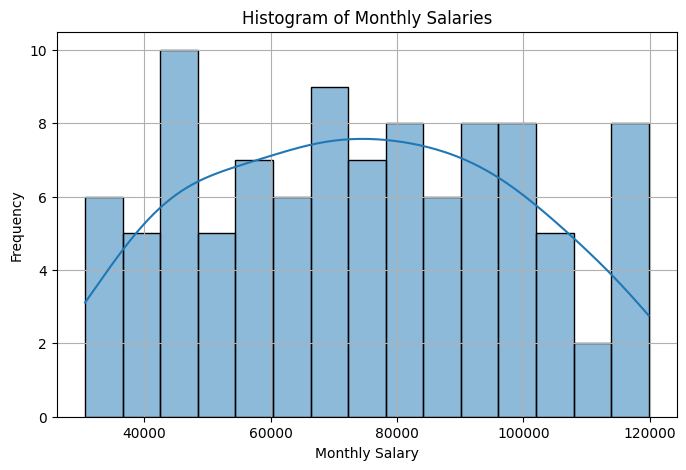

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Monthly_Salary'], bins=15, kde=True)
plt.title("Histogram of Monthly Salaries")
plt.xlabel("Monthly Salary")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

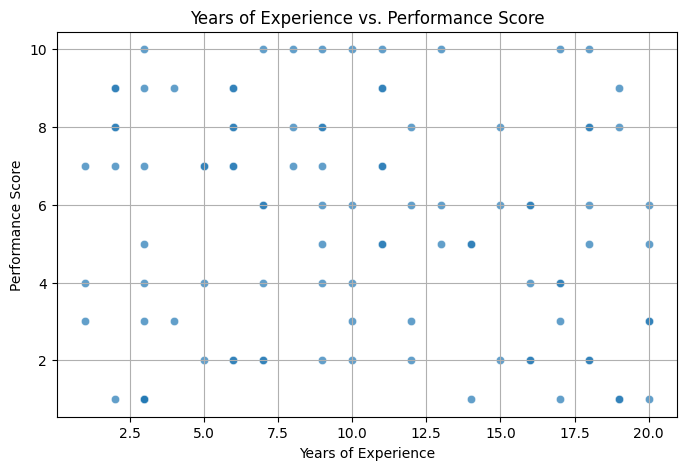

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Years_of_Experience"], y=df["Performance_Score"], alpha=0.7)
plt.title("Years of Experience vs. Performance Score")
plt.xlabel("Years of Experience")
plt.ylabel("Performance Score")
plt.grid(True)
plt.show()


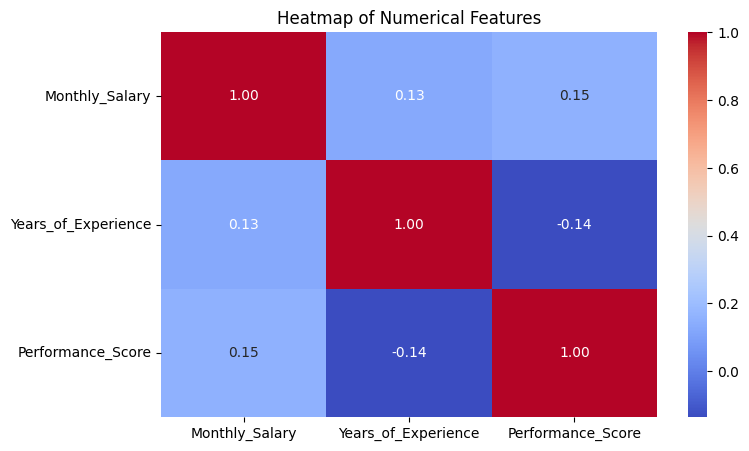

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Monthly_Salary', 'Years_of_Experience', 'Performance_Score']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Numerical Features")
plt.show()
